## Import Libraries

In [749]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [750]:
nba= pd.read_csv(r'C:\Users\Anas Saifi\Downloads\nba_2013.csv')

In [751]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


## Exploratory Data Analysis

In [752]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

### 1. Check datatypes, missing values in each column

In [753]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

### 2. Correlation Plot

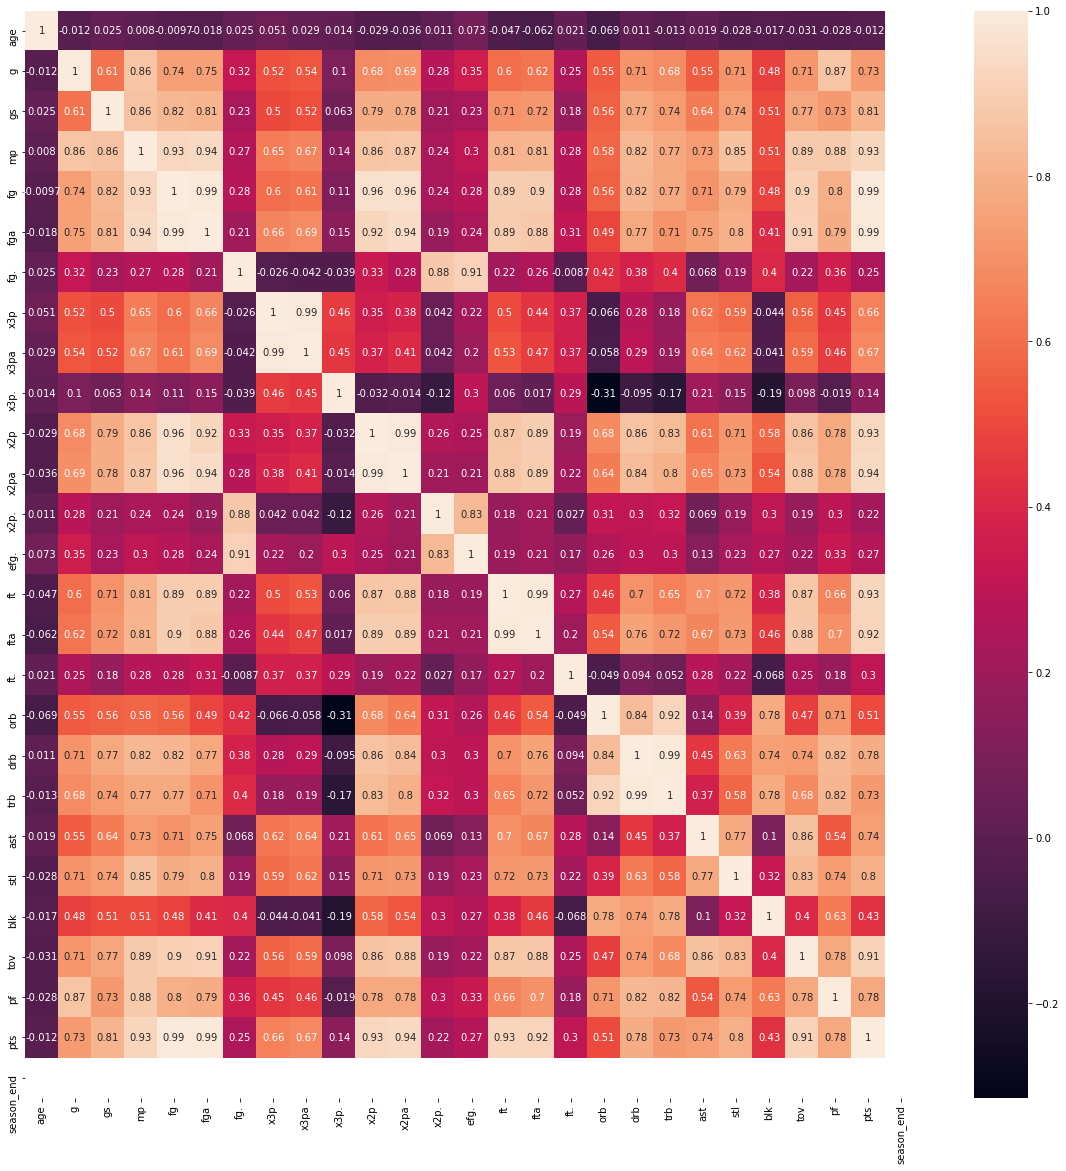

In [754]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(nba.corr(),annot=True)

### 3. Statistics Realted Information

In [755]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


## Preprocessing Steps

### 1. Label Encoding

In [756]:
## SG - Shooting guard -> debruyne types 5
## SF - small forward - winger 6
## PF - power forward - striker 4
## c - Center - basically to vreate a good game midfielder 3
## PG - Point guard - passer 2
## F - no info 1
## G - no info 0

In [757]:
pos_dict={'SF':6,'SG':5,'PF':4,'C':3,'PG':2,'F':1,'G':0}

In [758]:
nba['pos']=nba['pos'].map(pos_dict)

In [759]:
nba['pos']

0      6
1      3
2      4
3      5
4      3
      ..
476    5
477    5
478    4
479    3
480    3
Name: pos, Length: 481, dtype: int64

In [760]:
nba['pos'].value_counts()

5    109
6     99
4     96
3     90
2     85
1      1
0      1
Name: pos, dtype: int64

In [761]:
player_names=nba[['player','pos']]

In [762]:
nba.select_dtypes(include='object')

,player,bref_team_id,season
0,Quincy Acy,TOT,2013-2014
1,Steven Adams,OKC,2013-2014
2,Jeff Adrien,TOT,2013-2014
3,Arron Afflalo,ORL,2013-2014
4,Alexis Ajinca,NOP,2013-2014
...,...,...,...
476,Tony Wroten,PHI,2013-2014
477,Nick Young,LAL,2013-2014
478,Thaddeus Young,PHI,2013-2014
479,Cody Zeller,CHA,2013-2014


In [763]:
nba.drop(['player','bref_team_id','season'],axis=1,inplace=True)

### 2. Data Imputaion

In [764]:
col_with_missing_values=nba.columns[nba.isna().any()].tolist()

In [765]:
for column in col_with_missing_values:
    nba[column].fillna(value=nba[column].mean(), inplace=True)

In [766]:
x= nba.drop('pts', axis=1)
y= nba['pts']

In [767]:
x

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,season_end
0,6,23,63,0,847,66,141,0.468,4,15,...,0.660,72,144,216,28,23,26,30,122,2013
1,3,20,81,20,1197,93,185,0.503,0,0,...,0.581,142,190,332,43,40,57,71,203,2013
2,4,27,53,12,961,143,275,0.520,0,0,...,0.639,102,204,306,38,24,36,39,108,2013
3,5,28,73,73,2552,464,1011,0.459,128,300,...,0.815,32,230,262,248,35,3,146,136,2013
4,3,25,56,30,951,136,249,0.546,0,1,...,0.836,94,183,277,40,23,46,63,187,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5,20,72,16,1765,345,808,0.427,40,188,...,0.641,69,159,228,217,78,16,204,151,2013
477,5,28,64,9,1810,387,889,0.435,135,350,...,0.825,29,137,166,95,46,12,95,156,2013
478,4,25,79,78,2718,582,1283,0.454,90,292,...,0.712,166,310,476,182,167,36,165,213,2013
479,3,21,82,3,1416,172,404,0.426,0,1,...,0.730,118,235,353,92,40,41,87,170,2013


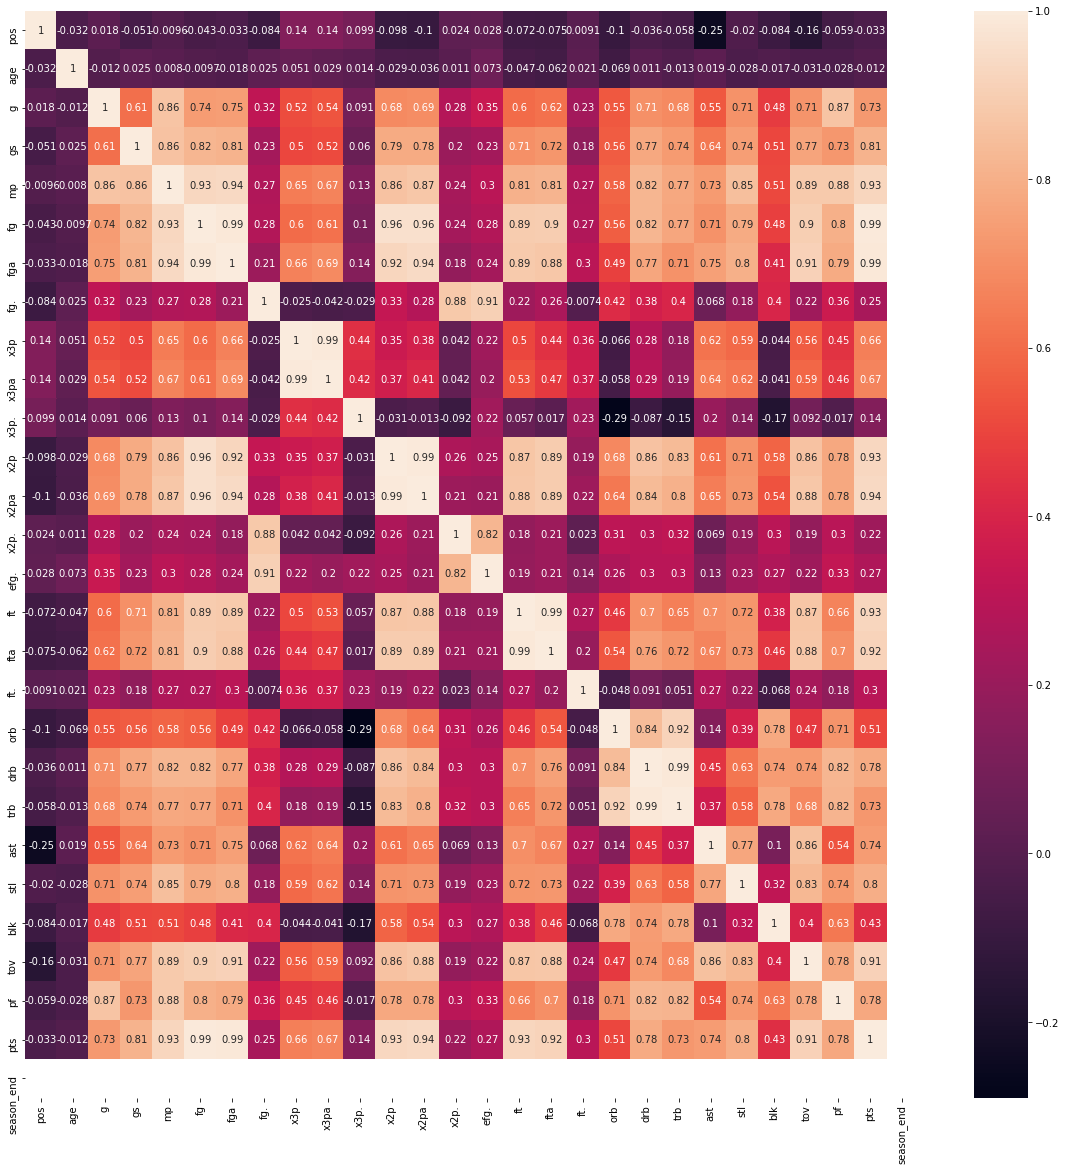

In [768]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(nba.corr(),annot=True)

In [769]:
y

0       171
1       265
2       362
3      1330
4       328
       ... 
476     939
477    1144
478    1417
479     490
480     399
Name: pts, Length: 481, dtype: int64

In [770]:
cols=nba.columns
len(cols)

28

In [771]:
cols

Index(['pos', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
       'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'season_end'],
      dtype='object')

### Feature Selection

C:\Python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


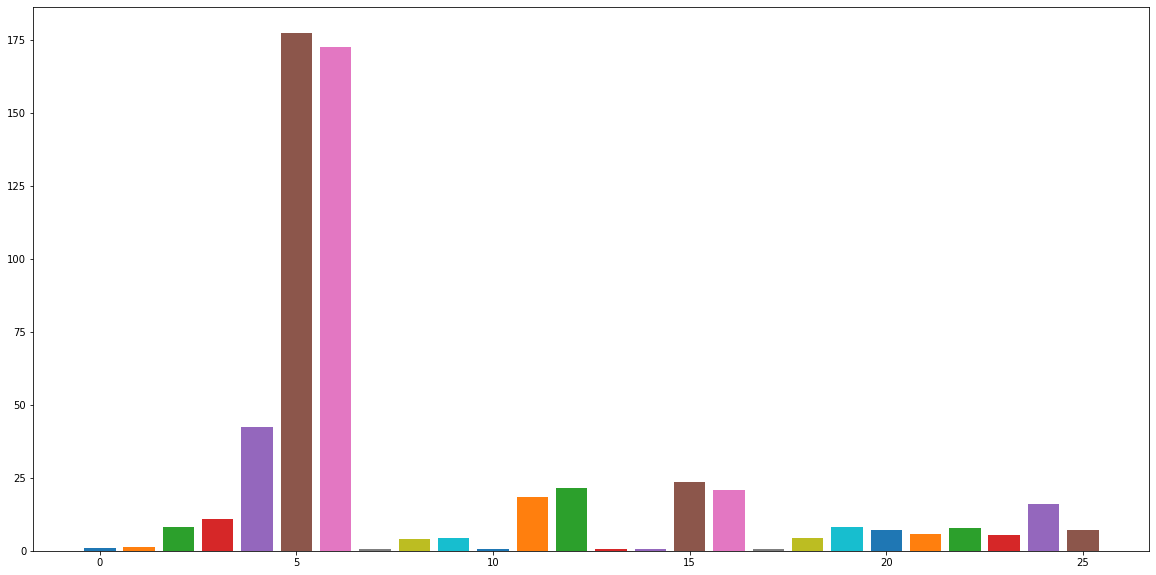

In [772]:
fvalue_Best = SelectKBest(f_classif, k='all')
fvalue_Best.fit(x, y)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
for i in range(len(fvalue_Best.scores_)):
    plt.bar(i,fvalue_Best.scores_[i])

In [773]:
x=nba[['pos','fg','fga','mp']]

In [774]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(481, 4) (384, 4) (97, 4)


### Finding optimal number of neighbors - elbow method

In [795]:
error_rate=[]

for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred1=knn.predict(x_test)
    error_rate.append(np.mean(pred1 != y_test))

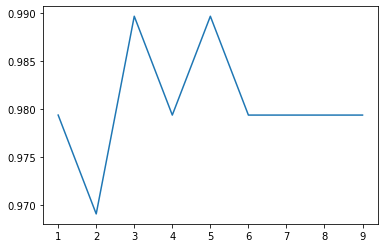

In [797]:

plt.plot(range(1,10),error_rate)

In [777]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [778]:
prediction= knn.predict(x_test)

# Model Evaluation using RMSE score

In [779]:
error= np.sqrt(mean_squared_error(y_test,prediction))

In [780]:
error

70.65729692146044

In [781]:
predicted_points=knn.predict(x)

In [782]:
pred_dict={'player_name':player_names['player'],'position':player_names['pos'],'original_points':y,'predicted_points':predicted_points}

In [783]:
len(pred_dict['player_name']),len(pred_dict['position']),len(pred_dict['original_points']),len(pred_dict['predicted_points'])

(481, 481, 481, 481)

In [784]:
pred_data_frame=pd.DataFrame(data=pred_dict)

In [785]:
pred_data_frame

,player_name,position,original_points,predicted_points
0,Quincy Acy,6,171,171
1,Steven Adams,3,265,211
2,Jeff Adrien,4,362,341
3,Arron Afflalo,5,1330,1304
4,Alexis Ajinca,3,328,328
...,...,...,...,...
476,Tony Wroten,5,939,939
477,Nick Young,5,1144,891
478,Thaddeus Young,4,1417,1264
479,Cody Zeller,3,490,419


## Inference Pipeline

In [789]:
input_data=[['C',1197,93,185]]

def pos_encoding(input_data):
    map_dict={'SF':6,'SG':5,'PF':4,'C':3,'PG':2,'F':1,'G':0}
    input_data=map_dict[input_data]
    return input_data

def encode(input_data):
    input_data[0][0]=pos_encoding(input_data[0][0])
    input_data[0][1]=input_data[0][1]
    input_data[0][2]=input_data[0][2]
    input_data[0][3]=input_data[0][3]
    return input_data

def scoring(input_data):
    data=encode(input_data)
    print(knn.predict(data))
    
scoring(input_data)

# input_data[0][0]=input_data[0][0].map(map_dict)
# #knn.predict(input_data)

[183]
